Name: Karma Yasser Ismail

Project: Stock Analysis

**Data Science Intern associated by CodeClause**

In [122]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly.express as px

In [123]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft_Stock.csv to Microsoft_Stock (5).csv


In [124]:
# Read Data
data = pd.read_csv('Microsoft_Stock.csv', na_values=['null'])
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [125]:
data['Date']=pd.to_datetime(data['Date'])
data['Date']

0      2015-04-01 16:00:00
1      2015-04-02 16:00:00
2      2015-04-06 16:00:00
3      2015-04-07 16:00:00
4      2015-04-08 16:00:00
               ...        
1506   2021-03-25 16:00:00
1507   2021-03-26 16:00:00
1508   2021-03-29 16:00:00
1509   2021-03-30 16:00:00
1510   2021-03-31 16:00:00
Name: Date, Length: 1511, dtype: datetime64[ns]

In [126]:
data.info() # Brief Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [127]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [128]:
data.duplicated().sum()

0

In [129]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


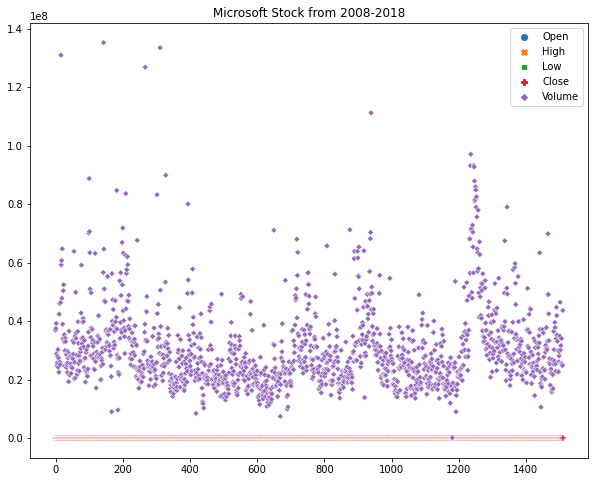

In [130]:
plt.figure(figsize=(10,8))
plt.title("Microsoft Stock from 2008-2018")
sns.scatterplot(data=data)

**Close** **Analysis**

Text(0.5, 0, 'Date')

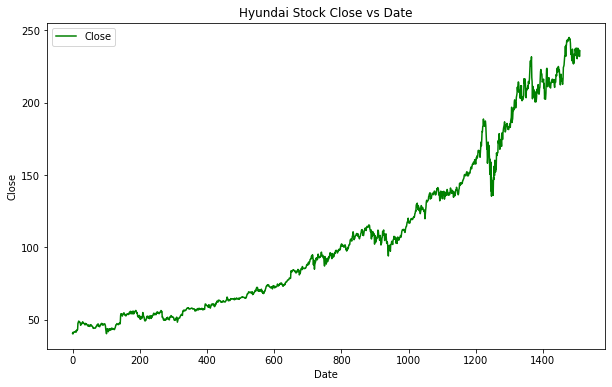

In [131]:
plt.figure(figsize=(10,6))
plt.title("Hyundai Stock Close vs Date")
sns.lineplot(data=data['Close'], label="Close", color ="green")
plt.xlabel("Date")

**Volume Analysis**



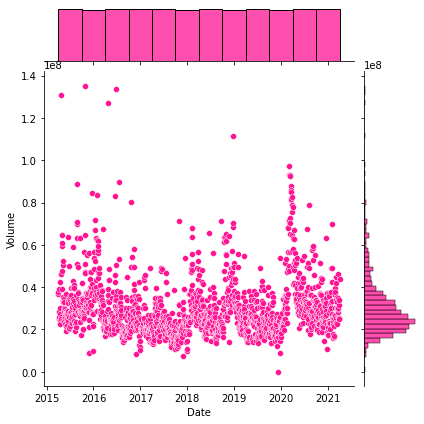

In [132]:
sns.jointplot(data = data, x=data["Date"], y=data["Volume"], color="deeppink")

In [133]:
data["Date"].unique()

array(['2015-04-01T16:00:00.000000000', '2015-04-02T16:00:00.000000000',
       '2015-04-06T16:00:00.000000000', ...,
       '2021-03-29T16:00:00.000000000', '2021-03-30T16:00:00.000000000',
       '2021-03-31T16:00:00.000000000'], dtype='datetime64[ns]')

**Analysing Daily price change in stock**


In [134]:
data['Daily Return']=((data['Close'] - data['Open']) /data['Close'])*100
data.head()

,Date,Open,High,Low,Close,Volume,Daily Return
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.294695
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.918342
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2.912154
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.192632
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.144858


In [135]:
fig = px.line(data, x="Date", y="Daily Return", title='Returns')
fig.show()

(array([737791., 737805., 737822., 737836., 737850., 737864., 737881.]),
 <a list of 7 Text major ticklabel objects>)

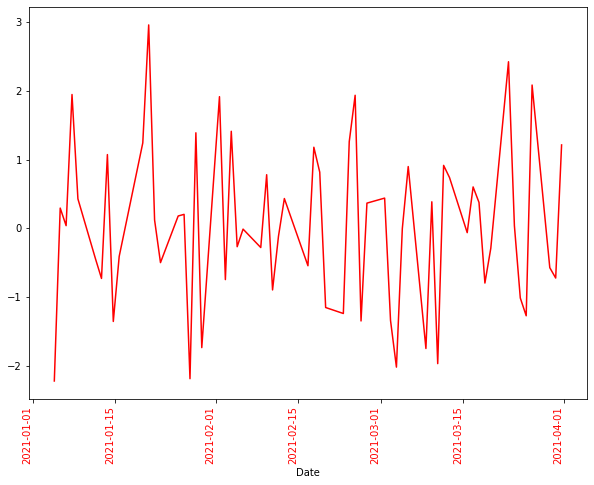

In [136]:
data.set_index('Date')['2021-01-01':'2021-03-31']['Daily Return'].plot( color = 'red', figsize=(10,8))
plt.xticks(rotation='vertical', color ="red")

**Analysing monthly mean of close column**

In [137]:
data2 = data.copy()
data2['date'] = pd.to_datetime(data['Date'])
data2.set_index('Date',inplace=True) # Create Date Column 
data2

,Open,High,Low,Close,Volume,Daily Return,date
Date,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.294695,2015-04-01 16:00:00
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.918342,2015-04-02 16:00:00
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2.912154,2015-04-06 16:00:00
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.192632,2015-04-07 16:00:00
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.144858,2015-04-08 16:00:00
...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,-1.273995,2021-03-25 16:00:00
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,2.084743,2021-03-26 16:00:00
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,-0.573882,2021-03-29 16:00:00


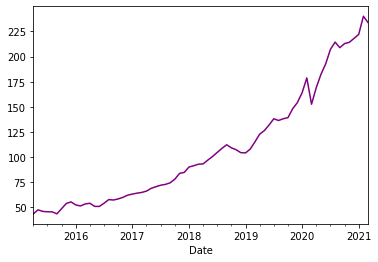

In [138]:
# Close Month wise
data2['Close'].resample('M').mean().plot(color = 'purple')

**Analysing yearly mean of close column**

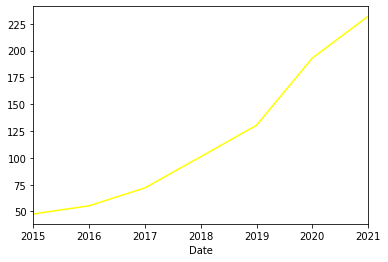

In [139]:
# Close Year Wise
data2['Close'].resample('Y').mean().plot(color='yellow')

In [140]:
data2.describe()

,Open,High,Low,Close,Volume,Daily Return
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,1511.000000
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07,0.036148
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07,1.288229
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05,-6.297779
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07,-0.572148
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07,0.069281
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07,0.741809
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08,7.133413


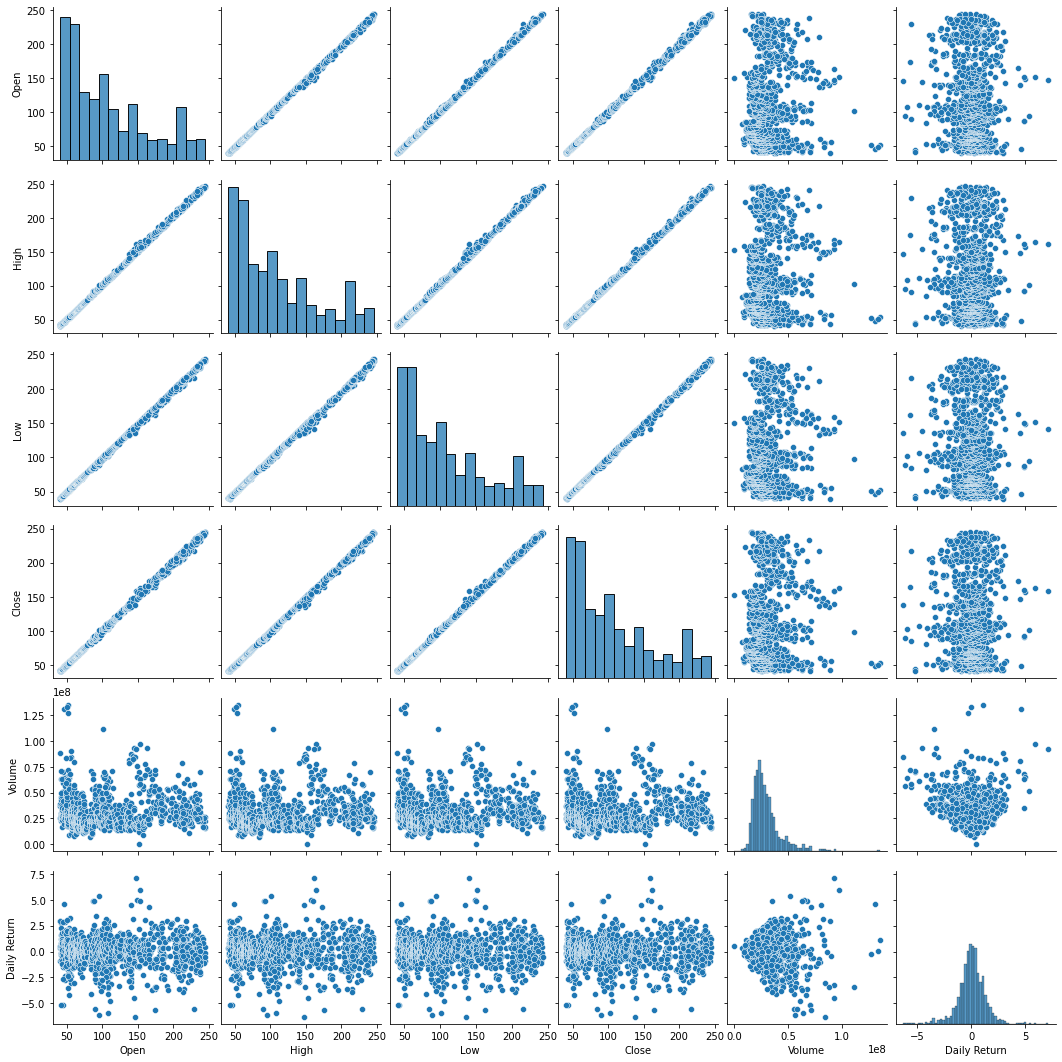

In [141]:
sns.pairplot(data=data2)

**Value at risk analysis**

In [142]:
data['Change']=((data['Close']- data['Open'])/ data['Close'])*100
data

,Date,Open,High,Low,Close,Volume,Daily Return,Change
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.294695,0.294695
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.918342,-0.918342
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,2.912154,2.912154
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,-0.192632,-0.192632
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.144858,-0.144858
...,...,...,...,...,...,...,...,...
1506,2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,-1.273995,-1.273995
1507,2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,2.084743,2.084743
1508,2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,-0.573882,-0.573882
1509,2021-03-30 16:00:00,233.53,233.85,231.10,231.85,24792012,-0.724606,-0.724606


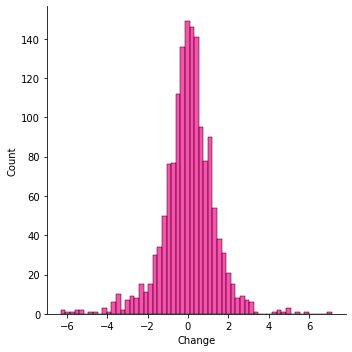

In [143]:
sns.displot(data['Change'], color = 'deeppink')

In [144]:
data['Change'].describe()

count    1511.000000
mean        0.036148
std         1.288229
min        -6.297779
25%        -0.572148
50%         0.069281
75%         0.741809
max         7.133413
Name: Change, dtype: float64

In [145]:
data['Change'].quantile(0.1)

-1.3494039041006172

** 90% of the times the worst daily Loss will not exceed 1.35**